# **DAV Assignment 2**

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

Mounting Drive to access files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Data

In [ ]:
DS1= pd.read_csv("/content/drive/MyDrive/CS312_DA/JK-Allopathic-Outpatient_attendance-May-2019.csv")

In [ ]:
DS2=pd.read_csv("/content/drive/MyDrive/CS312_DA/Fifa_player_football_data.csv")

# **OutPatient Attendance **

In [ ]:
DS1.head()

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5
2,Anantnag,SC,154,10,42,300,2,137,7,0,0
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9


**TASK1**: Compute total patient attendance for all “district” for all four range groups and plot the bar diagram. Set the bar plot parameters for better visualization.

In [ ]:
ds1= pd.DataFrame(DS1)

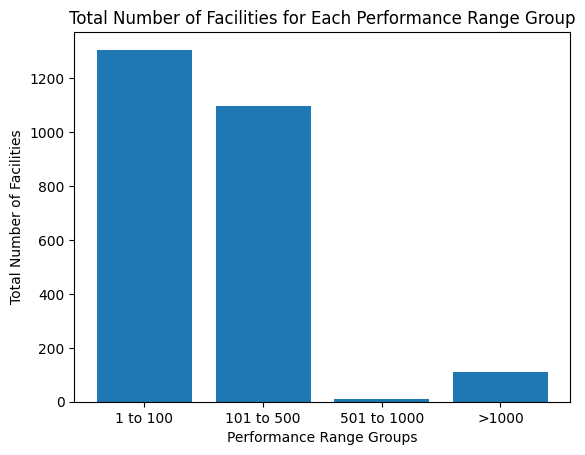

In [ ]:
total_performances = ds1[['No. of facilities by performance - 1 to 100',
                          'No. of facilities by performance - 101 to 500',
                          'No. of facilities by performance - 501 to 1000',
                          'No. of facilities by performance - >1000']].sum()

performance_labels = ['1 to 100', '101 to 500', '501 to 1000', '>1000']

plt.bar(performance_labels, total_performances)
plt.xlabel('Performance Range Groups')
plt.ylabel('Number of Facilities/Attendance')
plt.title('Total Number of Facilities for Each Performance Range Group')
plt.show()

**TASK2**:Compute total patient attendance for all “district” for each “Facility Type” (DH, CHC and SC) for all four range groups and plot the stacked bar diagram of three. Set the bar plot parameters for better visualization.

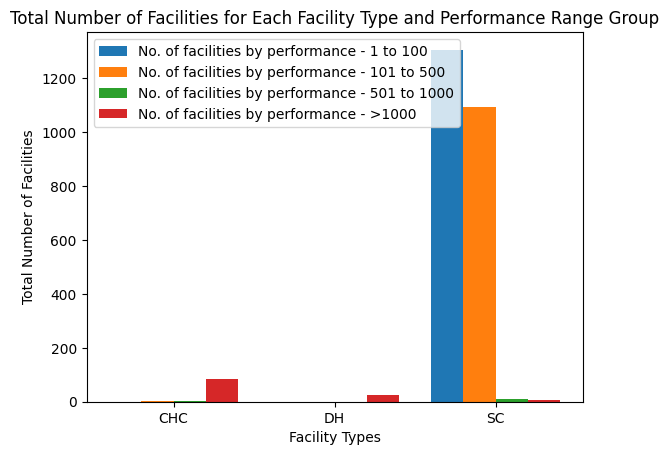

In [ ]:
# aggregating for computing total patient attendance
grouped_ds = ds1.groupby('Facility Type').agg({
    'No. of facilities by performance - 1 to 100': 'sum',
    'No. of facilities by performance - 101 to 500': 'sum',
    'No. of facilities by performance - 501 to 1000': 'sum',
    'No. of facilities by performance - >1000': 'sum'
})

# Plotting the grouped bar diagram
bar_width = 0.2
bar_positions = np.arange(len(grouped_ds.index))

for i, performance_range in enumerate(grouped_ds.columns):
    plt.bar(bar_positions + i * bar_width, grouped_ds[performance_range], width=bar_width, label=performance_range)

plt.xlabel('Facility Types')
plt.ylabel('Total Number of Facilities')
plt.title('Total Number of Facilities for Each Facility Type and Performance Range Group')
plt.xticks(bar_positions + (len(grouped_ds.columns) - 1) * bar_width / 2, grouped_ds.index)
plt.legend()
plt.show()

**TASK 3**:Plot group bar plot for “Performance - Overall Average” of different “Facility Type” (DH, CHC and SC) of Anantnag, Jammu, Poonch, Reasi and Udhampur.

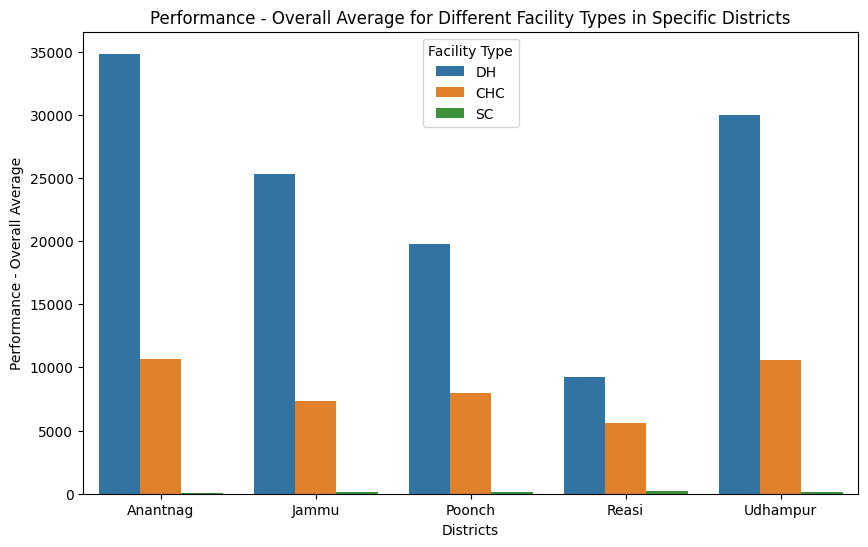

In [ ]:
selected_dist = ['Anantnag', 'Jammu', 'Poonch', 'Reasi', 'Udhampur']
selected_ftypes = ['DH', 'CHC', 'SC']

filtered_ds = ds1[(ds1['District'].isin(selected_dist)) & (ds1['Facility Type'].isin(selected_ftypes))]

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='District', y='Performance - Overall Average **', hue='Facility Type', data=filtered_ds, errorbar=None)
# setting properties for plot
plt.xlabel('Districts')
plt.ylabel('Performance - Overall Average')
plt.title('Performance - Overall Average for Different Facility Types in Specific Districts')
plt.show()

**TASK4**: Present dot plot for “Performance - Maximum” of any 20 different districts. “Performance - Maxi mum” for different “Facility Type” should be combined appropriately using an aggregation function for each district

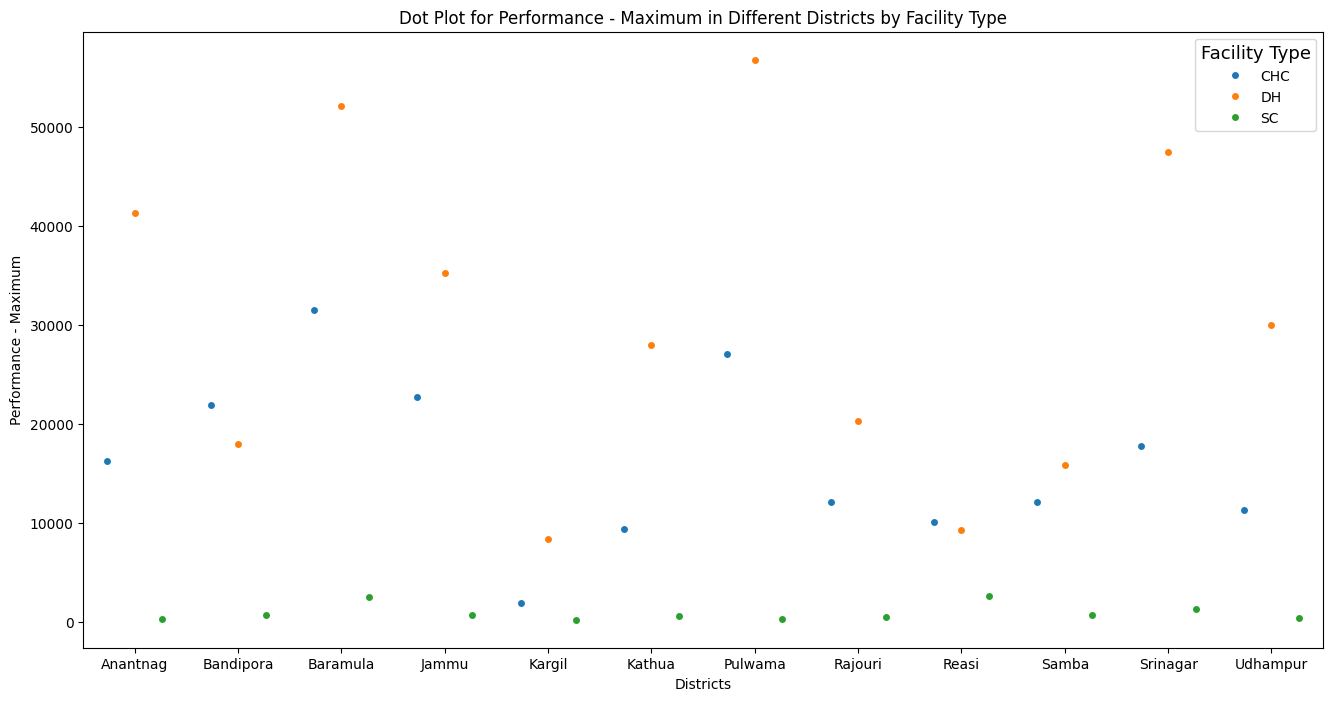

In [ ]:

# Random selection of 20 districts for illustration
selected_dists = ds1['District'].sample(20)

# Filtering the data for selected districts
filter_ds = ds1[ds1['District'].isin(selected_dists)]

# Aggregating "Performance - Maximum" by Facility Type for each district using the mean
agg_df = filter_ds.groupby(['District', 'Facility Type']).agg({'Performance - Maximum': 'mean'}).reset_index()

# Plotting the dot plot
plt.figure(figsize=(16, 8))
sns.stripplot(x='District', y='Performance - Maximum', hue='Facility Type', data=agg_df, jitter=True, dodge=True, marker='o')

plt.xlabel('Districts')
plt.ylabel('Performance - Maximum')
plt.title('Dot Plot for Performance - Maximum in Different Districts by Facility Type')
plt.legend(title='Facility Type', title_fontsize='13')
plt.show()


# **FIFA_Data**


Data Load into Dataframe and overview

In [ ]:
ds2=pd.DataFrame(DS2)

In [ ]:
ds2.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**TASK1:** Present “Age” of various football players as histogram and kernel density plots. Set appropriate parameters of the plot.

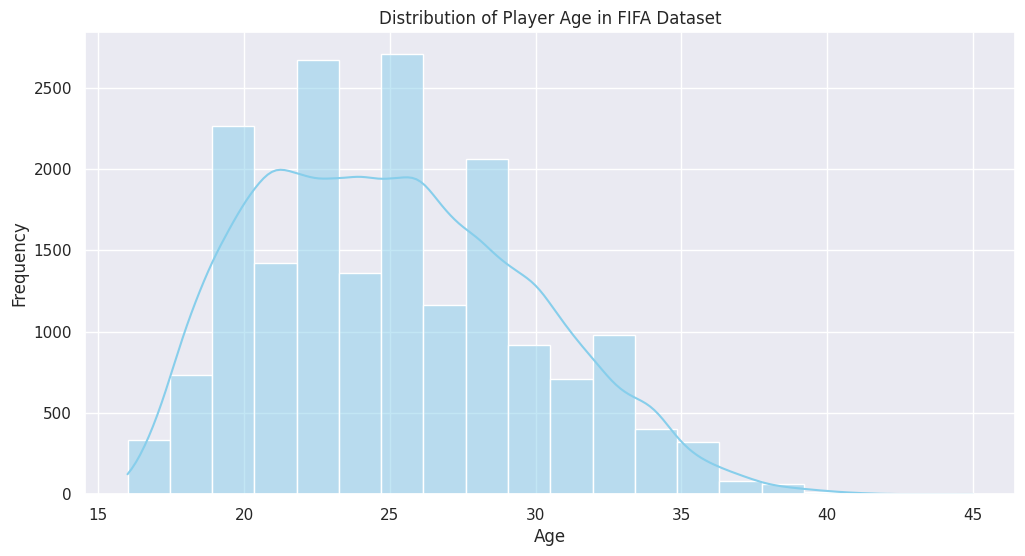

In [ ]:
# Setting the style of the plot
sns.set(style="darkgrid")

# Create a histogram and kernel density plot for the "Age" column
plt.figure(figsize=(12, 6))
sns.histplot(ds2['Age'], kde=True, color='skyblue', bins=20)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Player Age in FIFA Dataset')

# Show the plot
plt.show()

**TASK2**:Present “Age” of various Football players as Kernel Density plots for each of FC Barcelona, Chelsea, Juventus and Real Madrid Clubs. Set appropriate parameters of the plot.

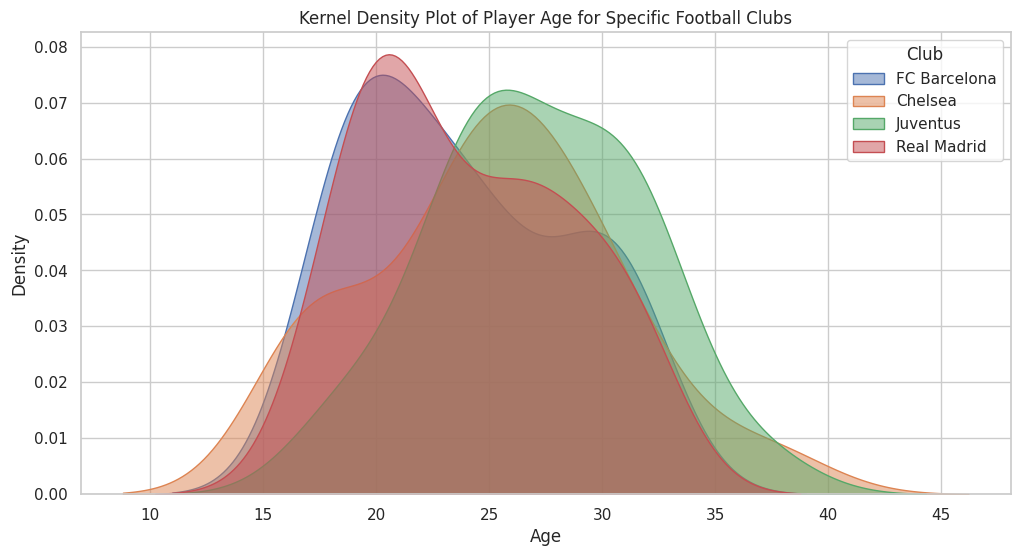

In [ ]:
# Select data for the specified clubs
selected_clubs = ['FC Barcelona', 'Chelsea', 'Juventus', 'Real Madrid']
filtered_dss2 = ds2[ds2['Club'].isin(selected_clubs)]

# Set the style of the plot
sns.set(style="whitegrid")

# Create a Kernel Density plot for the "Age" column for each club
plt.figure(figsize=(12, 6))
for club in selected_clubs:
    sns.kdeplot(data=filtered_dss2[filtered_dss2['Club'] == club], x='Age', label=club, fill=True, alpha=0.5)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Player Age for Specific Football Clubs')

# Show the legend
plt.legend(title='Club')
plt.show()

**TASK3**:Plot “Value” of players as Stacked Histogram “Preferred Foot” wise (right and left).

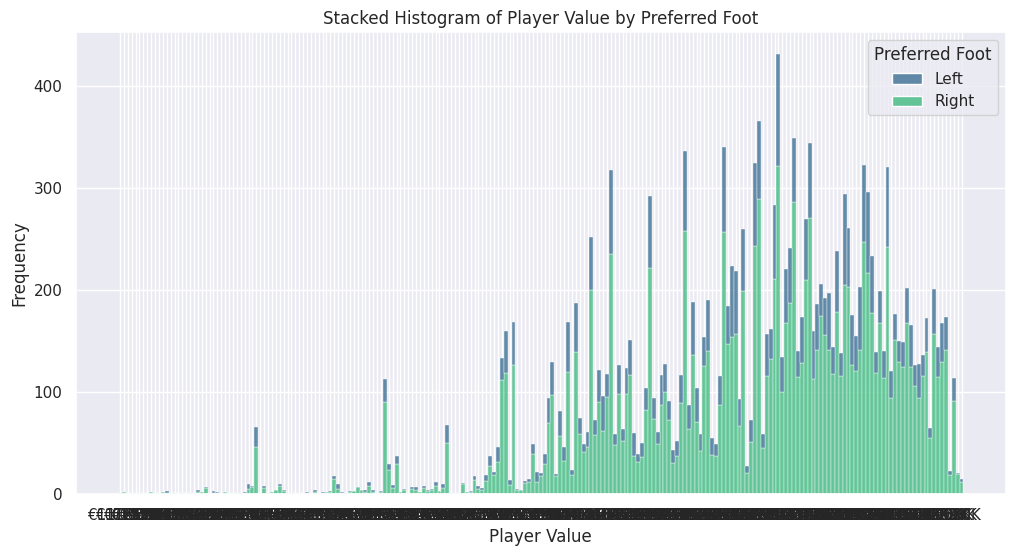

In [ ]:
sns.set(style="darkgrid")

# Create a stacked histogram for "Value" based on "Preferred Foot"
plt.figure(figsize=(12, 6))
sns.histplot(data=ds2, x='Value', hue='Preferred Foot', multiple='stack', bins=30, palette='viridis')

# Set plot labels and title
plt.xlabel('Player Value')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Player Value by Preferred Foot')

# Show the plot
plt.show()

**TASK4**:Check distribution of “International Reputation” using Q-Q plot.

<Figure size 1000x600 with 0 Axes>

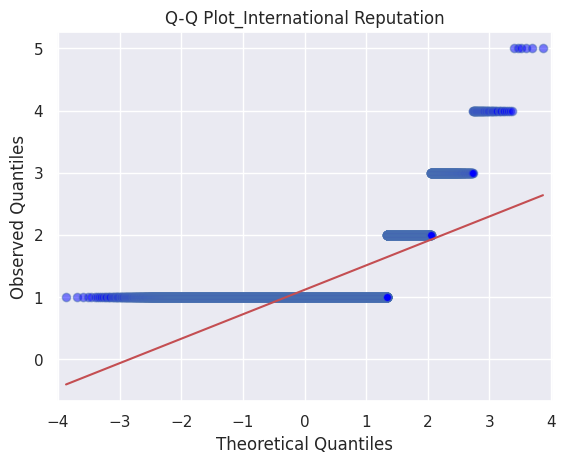

In [ ]:
# Select the column for Q-Q plot
intl_rep = ds2['International Reputation'].dropna()

# Create the Q-Q plot
plt.figure(figsize=(10, 6))
qqplot(intl_rep, line='s', color='skyblue', markerfacecolor='blue', alpha=0.5)

# Set plot labels and title
plt.title('Q-Q Plot_International Reputation')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')

# Show the plot
plt.show()